In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
data = pd.read_excel(r"C:\Users\safreena\Downloads\CocaCola_Sales_Rawdata.xlsx")

In [3]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

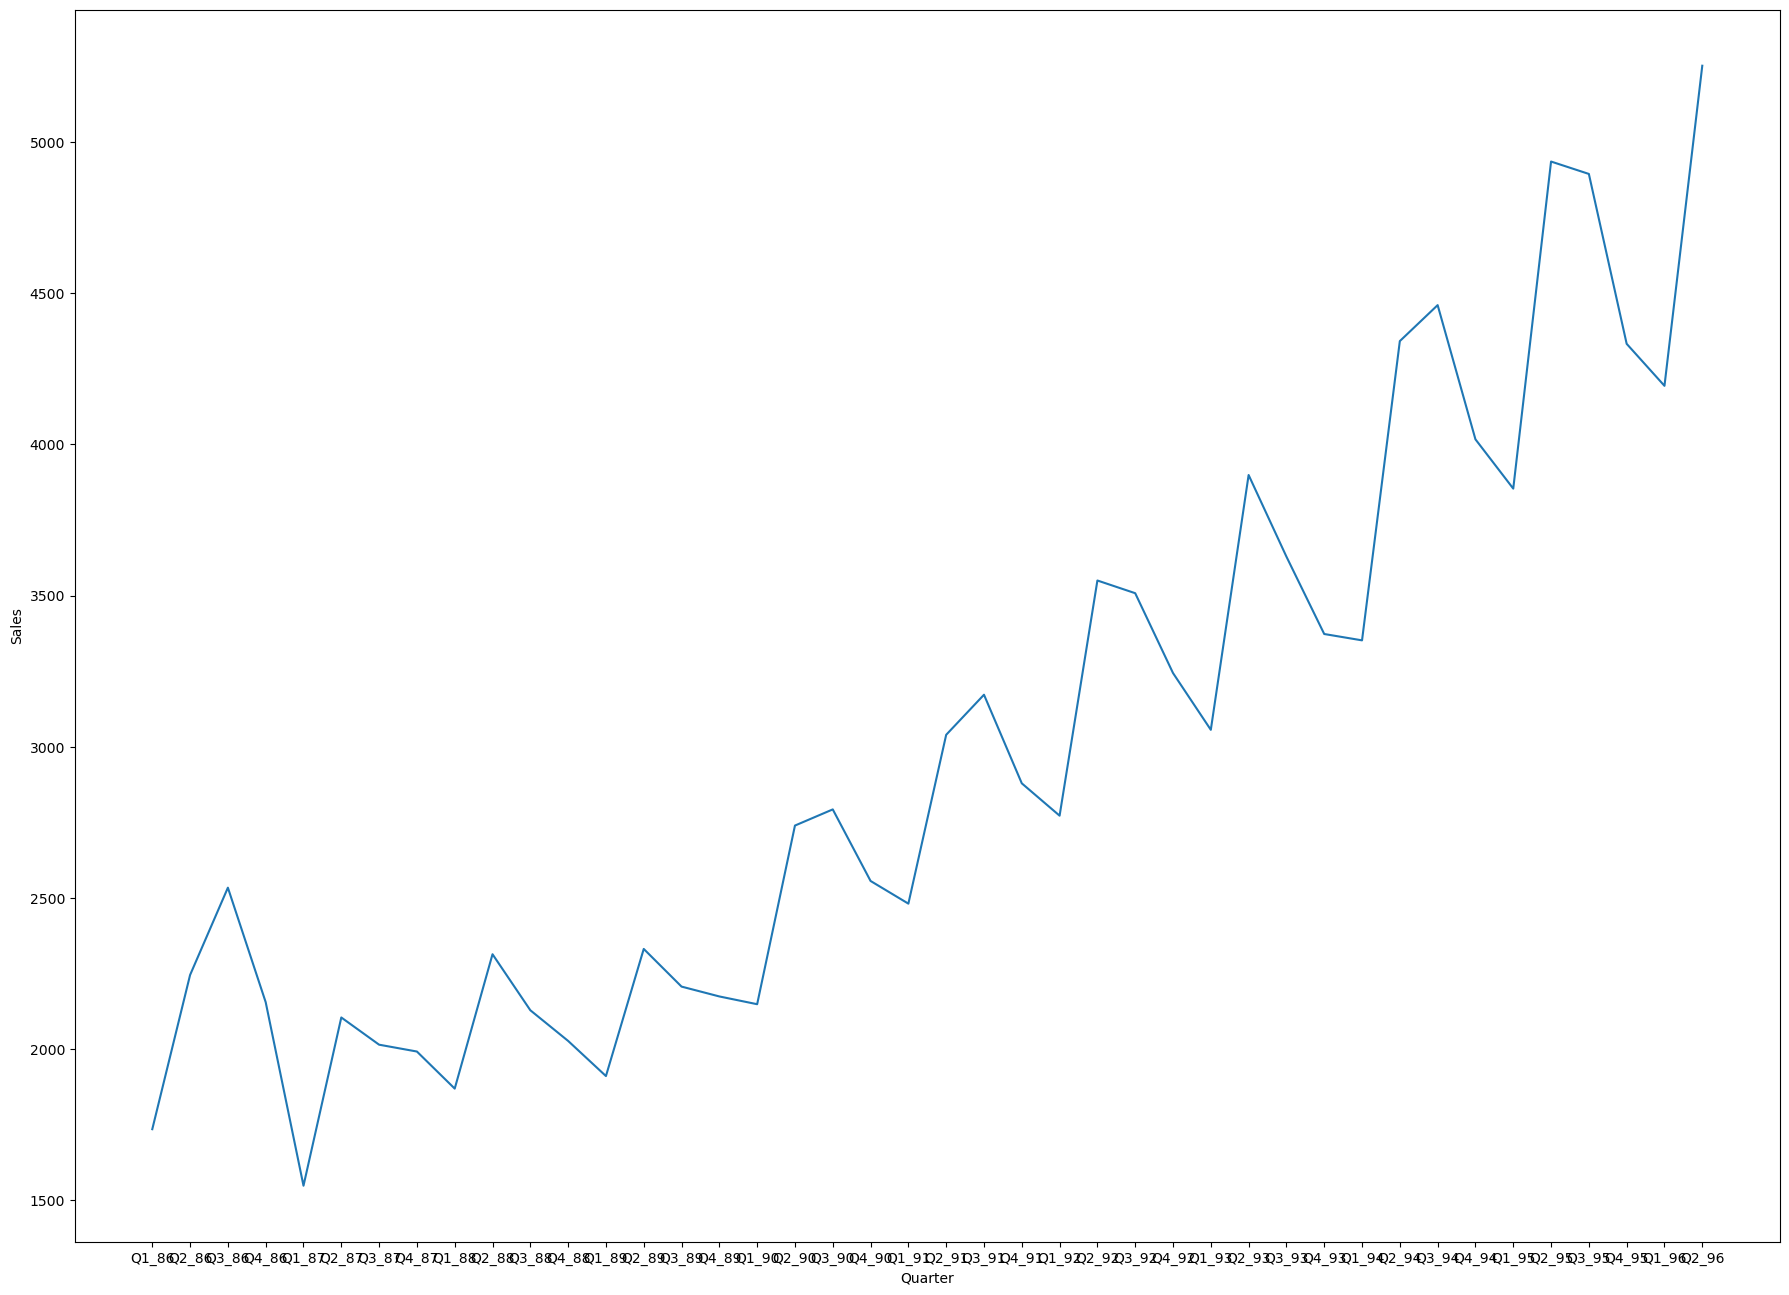

In [4]:
## Data visualisation
plt.figure(figsize=(22,16))
sns.lineplot(x="Quarter",y="Sales",data=data)

C:\Users\safreena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

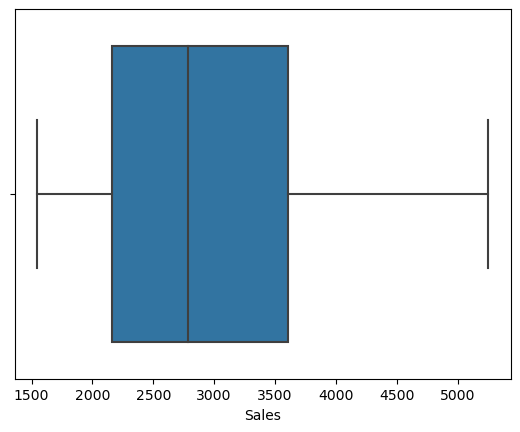

In [5]:
##Boxplot
sns.boxplot("Sales",data=data)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

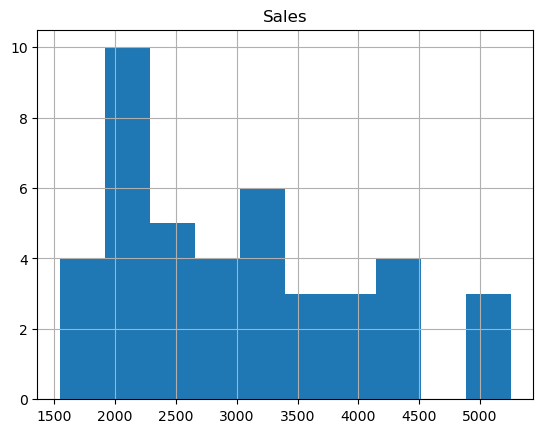

In [7]:
##Histogram
data.hist()

<AxesSubplot:ylabel='Density'>

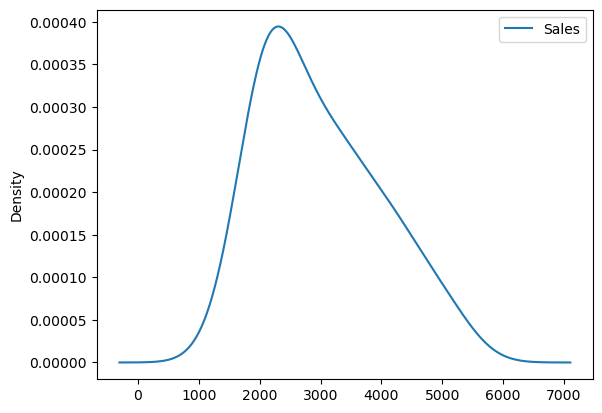

In [8]:
##Density plot
data.plot(kind='kde')

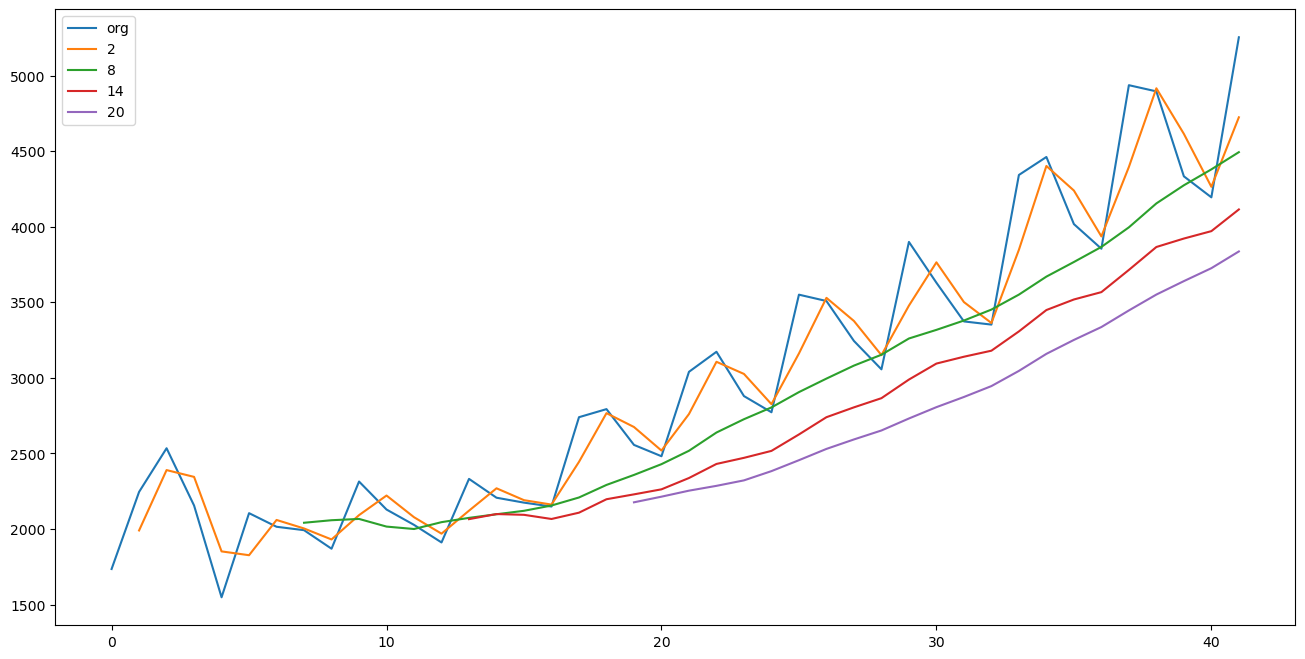

In [9]:
##Moving Average
plt.figure(figsize=(16,8))
data.Sales.plot(label="org")
for i in range(2,24,6):
    data['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

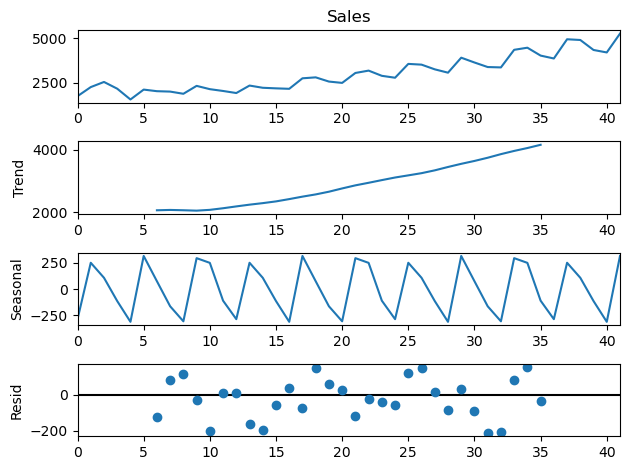

In [10]:
##Time series decomposition plot
decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

C:\Users\safreena\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


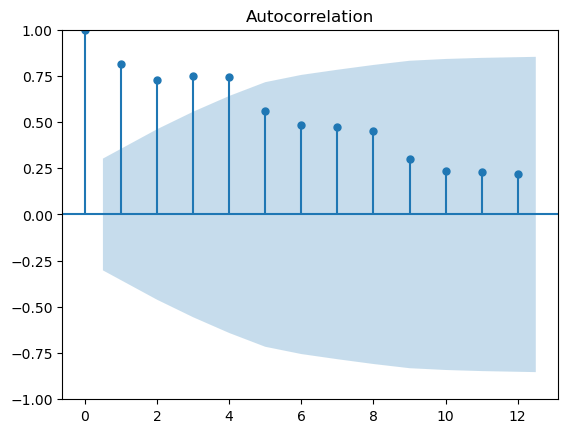

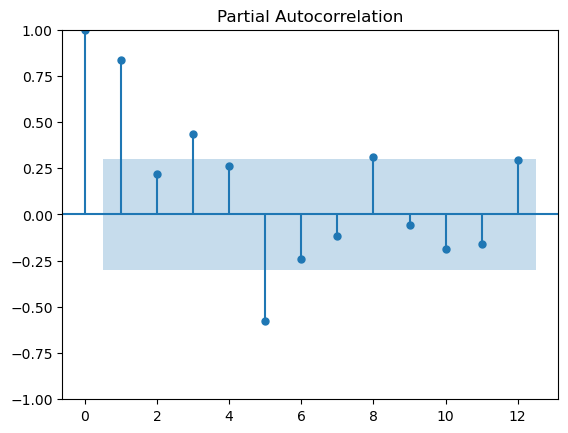

In [11]:
##ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

In [12]:
##Data Splitting
data.count()


Quarter    42
Sales      42
dtype: int64

In [13]:
train = data.head(30)
test = data.tail(12)

## Evaluation Metric MAPE

In [14]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method

In [15]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales) 

22.046763674416013

## Holt method

In [16]:
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Sales) 

C:\Users\safreena\AppData\Local\Temp\ipykernel_9944\1267856404.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


11.21384176728494

## Holts winter exponential smoothing with additive seasonality and additive trend

In [17]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Sales) 

5.321405701012627

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [18]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

9.329399697771025

## Final Model by combining train and test

In [19]:
hwe_model_mul_add = ExponentialSmoothing(data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

## Forecasting next 10

In [20]:
hwe_model_mul_add.forecast(10)

42    5012.344209
43    4653.573883
44    4512.618744
45    5673.548341
46    5715.159774
47    5161.415217
48    4909.552114
49    6205.541243
50    6166.703338
51    5529.963063
dtype: float64

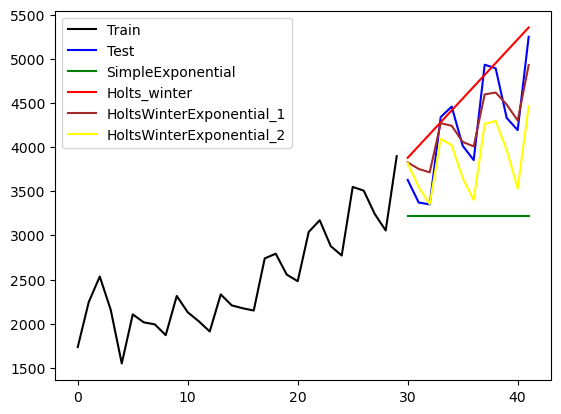

In [21]:
plt.plot(train.index, train["Sales"], label='Train',color="black")
plt.plot(test.index, test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')